In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle


plt.rcParams['figure.figsize'] = (20.0, 10.0)
# plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['figure.dpi'] = 500
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
# checking algorithm from the .py
file = 'ML-MoS2-532-LP10-2-3-50X.txt'
location = '../data/Green_excitation/'
# location = '../data/New_Raman_data/'
# file = 'SnS-1L-WS2_532nm_Edge_0_1%_0_2 s_1_1.txt'

In [3]:
df = pd.read_csv(location + file, delimiter='\t', skipinitialspace=True, header=None, skiprows=[])
wavelength = df.iloc[0].to_numpy()[2:]
data = df.iloc[1:].to_numpy()

X = list(np.unique(data[:,0]))
Y = list(np.unique(data[:,1]))

img = np.empty((len(X), len(Y), len(wavelength)), dtype=np.float64)

for d in data:
    i = X.index(d[0])
    j = Y.index(d[1])
    img[i,j,:] = d[2:]

In [10]:
img.shape

(150, 25, 1253)

In [5]:
# os.makedirs(f'{location}raw_npy/', exist_ok=True)
# np.save(f'{location}raw_npy/{file.split(".")[0]}', img) 

In [6]:
# np.save(f'{location}raw_npy/{file.split(".")[0]}_wavelength.npy', wavelength)
# file = 'SnS-1L-WS2_532nm_Edg

In [7]:
labels = {file.split(".")[0] + ".npy": [0,0,0,0]}

with open(f'{location}Sample_labels.pickle', 'wb') as f:
    pickle.dump(labels, f)

In [12]:
test = img.reshape(-1,img.shape[-1])

2299255


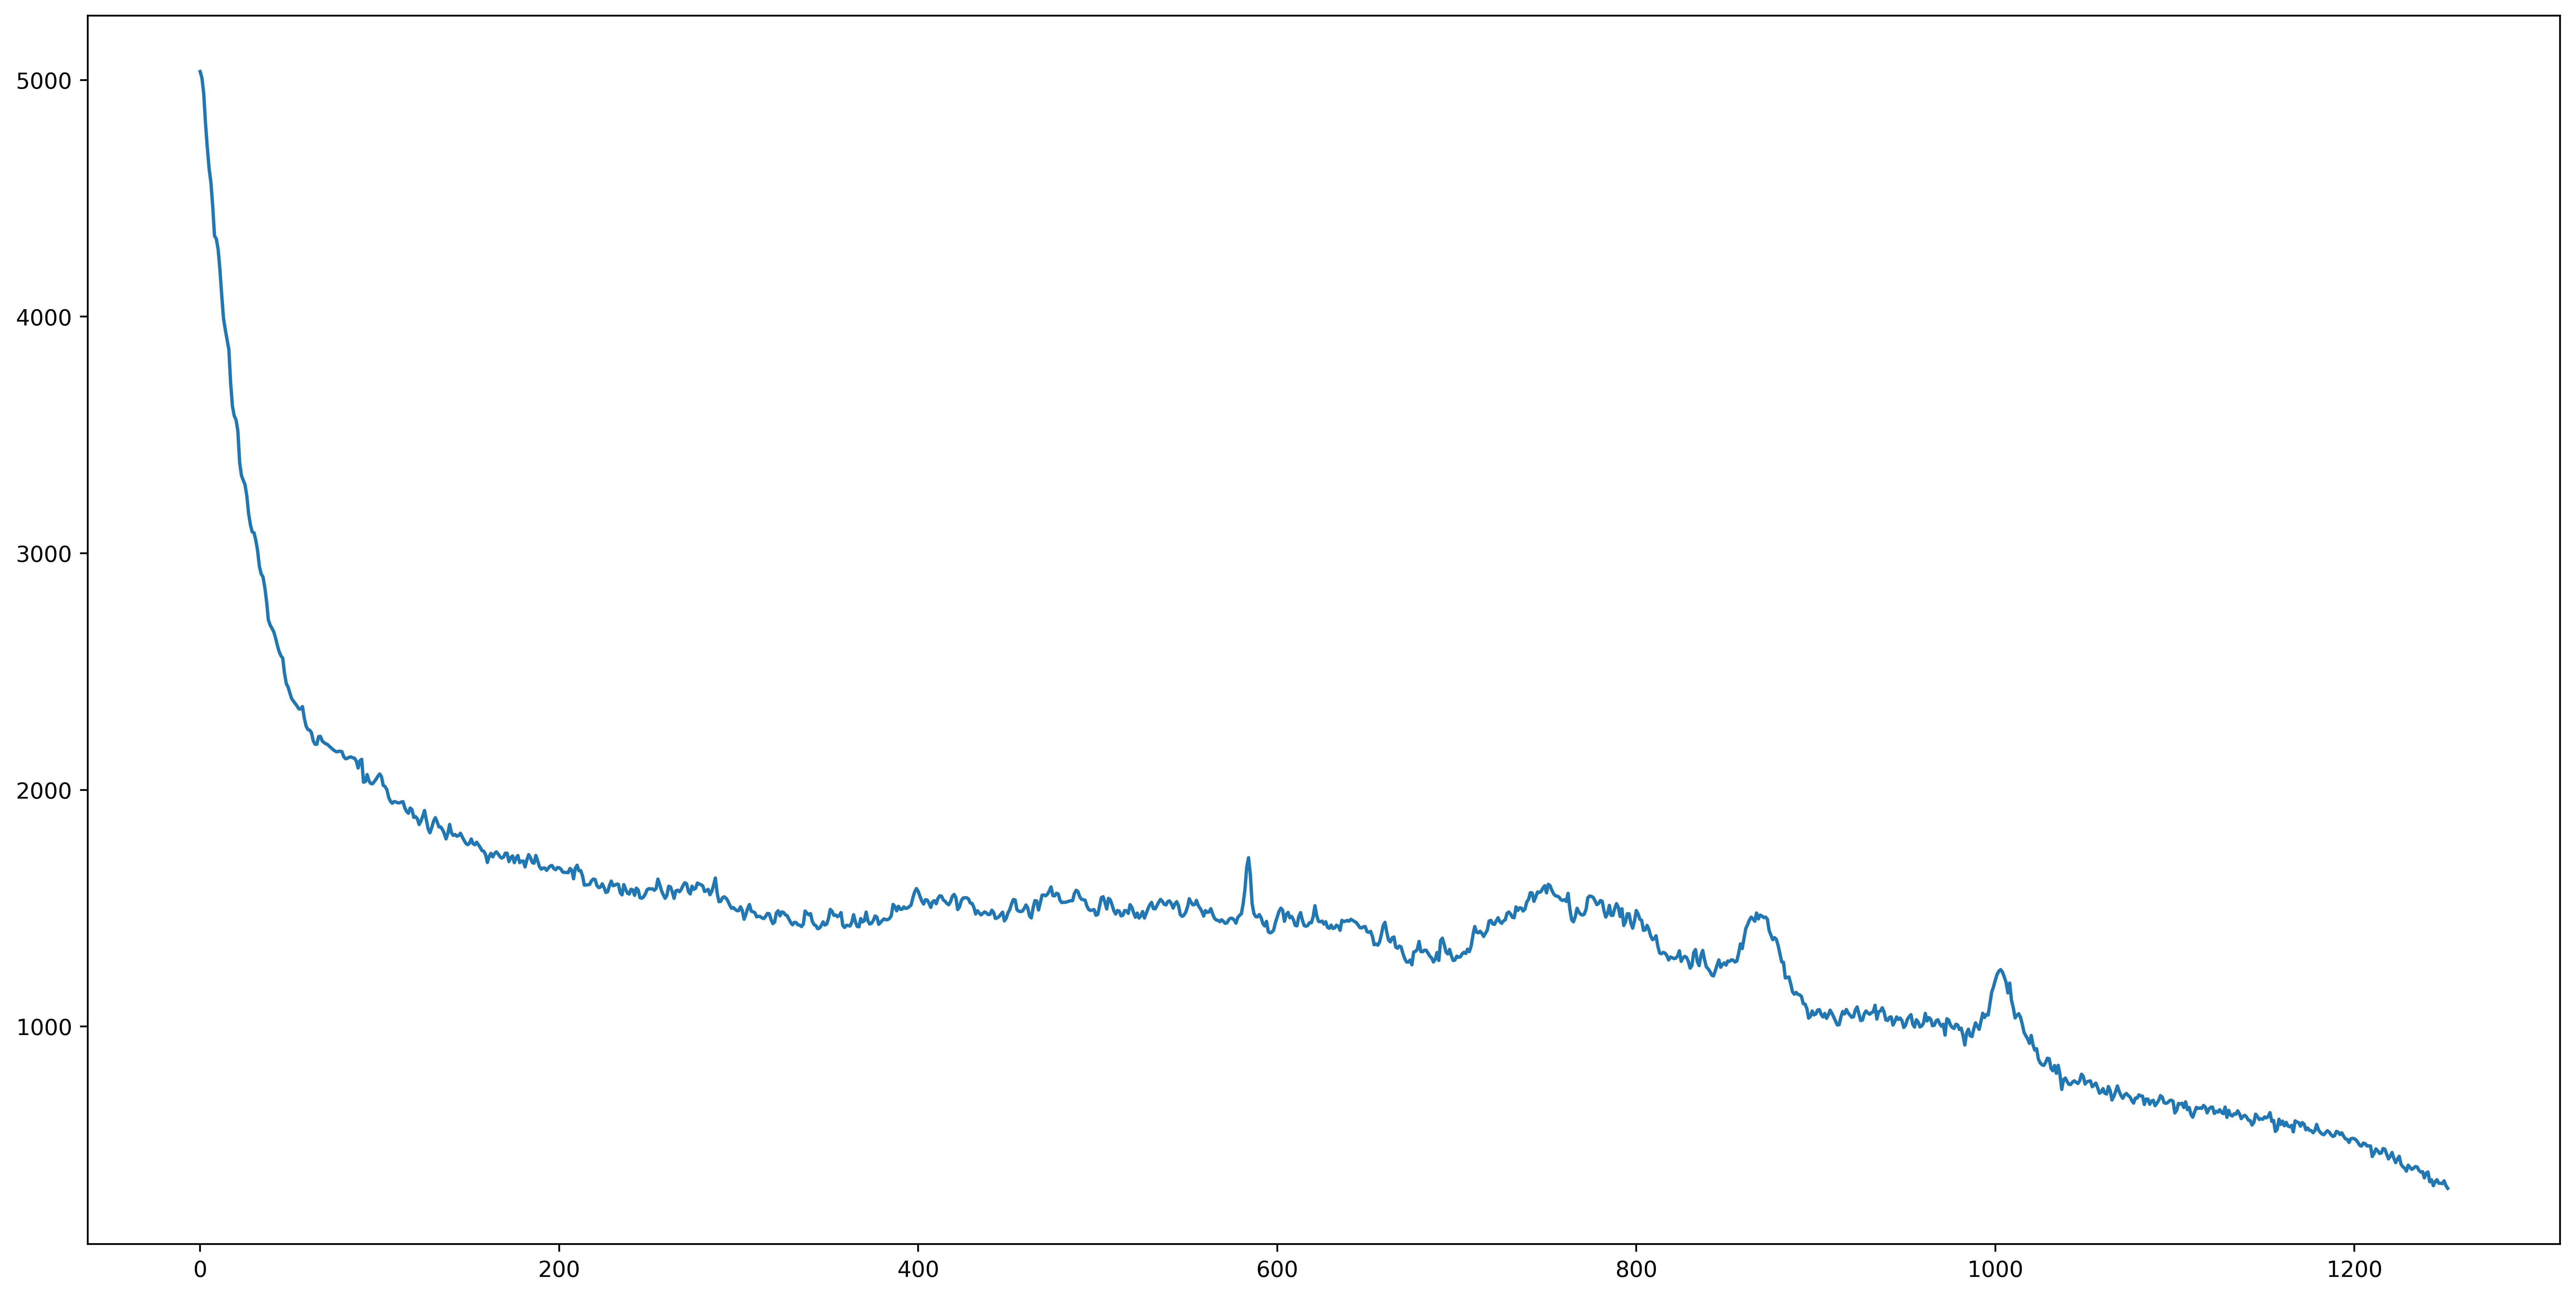

In [13]:
print(np.argmax(test))
x,y = 15, 24
# plt.plot(test[x*y])
# plt.plot(test[5788158//test.shape[1]])
plt.plot(test[0])

In [10]:
wavelength

array([ 300.243,  302.039,  303.834, ..., 6297.68 , 6298.48 , 6299.27 ])

In [11]:
from signal_processing import smoothing, splitting

# import smoothing

remove_noise_cube_fft = smoothing.RemoveNoiseFFTPCA(algorithm='PCA', percentage_noise=0.1, wavenumbers=wavelength, min_HWHM=2, Print=False)
x = remove_noise_cube_fft(test)
x.shape

SyntaxError: invalid syntax (smoothing.py, line 118)

In [ ]:
plt.plot(test[0])
plt.plot(x[0])